# Homework 2
## Exercice 1
### Gettings started

Loading training data

In [2]:
import pandas as pd
col_id = ['x1', 'x2', 'y']
data_train = pd.read_csv('ex1-data-train.csv', names=col_id)
data_train.head(3)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


Plotting the training data

Text(0,0.5,'Exam 2 Score x2')

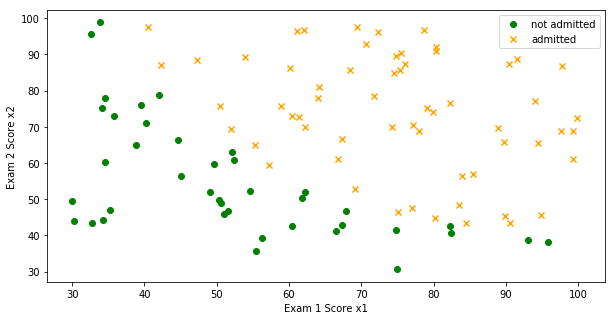

In [3]:
import matplotlib.pyplot as plt
x = data_train[col_id[:2]]
y = data_train[col_id[-1:]]

neg = y[y['y'] == 0].index
pos = y[y['y'] == 1].index

plt.figure(figsize=(10, 5))
plt_neg = plt.scatter(x.loc[neg][col_id[0]],x.loc[neg][col_id[1]], c='green', marker='o')
plt_pos = plt.scatter(x.loc[pos][col_id[0]],x.loc[pos][col_id[1]], c='orange', marker='x')

#plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label=labelPos)

plt.legend((plt_neg,plt_pos),("not admitted","admitted"),loc='upper right')
plt.xlabel("Exam 1 Score x1")
plt.ylabel("Exam 2 Score x2")

*Dummy* recognition system

In [3]:
from random import choice
import numpy as np
def dummy_recognition(data):
    result = np.zeros(data.shape[0])
    for i in range(len(result)):
        result[i] = choice([0, 1])
    return result

Dummy recognition performance on test dataset

In [4]:
data_test = pd.read_csv('ex1-data-test.csv', names=col_id)

result_dummy = dummy_recognition(data_test)
result_test = data_test[col_id[-1:]]['y']

def get_performance(data_1, data_2):
    return sum(1 for x in (data_1 == data_2) if x) / data_1.shape[0]
    
    
print(str(round(get_performance(result_test,result_dummy)*100))+"%")


52%


### KNN Classifier

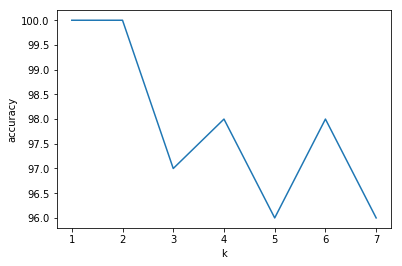

In [22]:
from collections import Counter

def euclidian_dist(data_1, data_2, k):
    euc_distance = np.sqrt(np.sum(np.square(data_1 - data_2) , axis=1))
    return np.argsort(euc_distance)[0:k]

def knn(data_x, data_y, k):
    predictions = []
    for point in data_x:
        results = []
        distances = euclidian_dist(data_x, point, k)

        for index in distances:
            results.append(data_y[index])
        
        counter = Counter(results).most_common(1)
        predictions.append([point,counter[0][0]])
        
    return predictions

def predict_accuracy(y_predict, y_ground):
    error = np.sum(np.square(y_predict - y_ground))
    accuracy = 100 - (error / len(y_ground)) * 100
    return accuracy

x_train = np.array(data_train[col_id[:2]])
x_test = np.array(data_test[col_id[:2]])
y_train = np.array(data_train[col_id[-1:]]['y'])
y_test = np.array(data_test[col_id[-1:]]['y'])
runs=[]
k = 7
classes_0 = []
for k in range(1, k+1):
    class_0 = []
    results = knn(x_train, y_train, k)
    results = knn(x_test, y_test, k)
    y_predict = []
    for result in results:
        y_predict.append(result[1])
        class_0.append(result[1] == 0)
    #runs.append([predict_accuracy(y_predict, y_train), k])
    runs.append([predict_accuracy(y_predict, y_test), k])
    classes_0.append([class_0,sum(1 for x in class_0 if x)])
    
x_plot = []
y_plot = []
for run in runs:
    x_plot.append(run[1])
    y_plot.append(run[0])
    
plt.plot(x_plot, y_plot)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

- Best performance are given by k = 1 and 2

In [20]:
for class_0 in classes_0:
    print(len(class_0[0]),class_0[1])

100 50
100 50
100 51
100 52
100 50
100 52
100 54


In the cases where votes are equal, it chooses the class 0